**Import TensorFlow**

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Download and prepare the CIFAR10 dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
train_images[0,1]

array([[ 16,  20,  20],
       [  0,   0,   0],
       [ 18,   8,   0],
       [ 51,  27,   8],
       [ 88,  51,  21],
       [120,  82,  43],
       [128,  89,  45],
       [127,  86,  44],
       [126,  87,  50],
       [116,  79,  44],
       [106,  70,  37],
       [101,  67,  35],
       [105,  70,  36],
       [113,  74,  35],
       [109,  70,  33],
       [112,  72,  37],
       [119,  79,  44],
       [109,  71,  33],
       [105,  69,  27],
       [125,  89,  46],
       [127,  92,  46],
       [122,  85,  39],
       [131,  89,  47],
       [124,  82,  41],
       [121,  79,  37],
       [131,  89,  48],
       [132,  91,  53],
       [133,  94,  58],
       [133,  96,  60],
       [123,  88,  55],
       [119,  83,  50],
       [122,  87,  57]], dtype=uint8)

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
train_images[0,1]

array([[0.0627451 , 0.07843137, 0.07843137],
       [0.        , 0.        , 0.        ],
       [0.07058824, 0.03137255, 0.        ],
       [0.2       , 0.10588235, 0.03137255],
       [0.34509804, 0.2       , 0.08235294],
       [0.47058824, 0.32156863, 0.16862745],
       [0.50196078, 0.34901961, 0.17647059],
       [0.49803922, 0.3372549 , 0.17254902],
       [0.49411765, 0.34117647, 0.19607843],
       [0.45490196, 0.30980392, 0.17254902],
       [0.41568627, 0.2745098 , 0.14509804],
       [0.39607843, 0.2627451 , 0.1372549 ],
       [0.41176471, 0.2745098 , 0.14117647],
       [0.44313725, 0.29019608, 0.1372549 ],
       [0.42745098, 0.2745098 , 0.12941176],
       [0.43921569, 0.28235294, 0.14509804],
       [0.46666667, 0.30980392, 0.17254902],
       [0.42745098, 0.27843137, 0.12941176],
       [0.41176471, 0.27058824, 0.10588235],
       [0.49019608, 0.34901961, 0.18039216],
       [0.49803922, 0.36078431, 0.18039216],
       [0.47843137, 0.33333333, 0.15294118],
       [0.

**Verify the data**

In [6]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
train_labels[3][0]

4

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

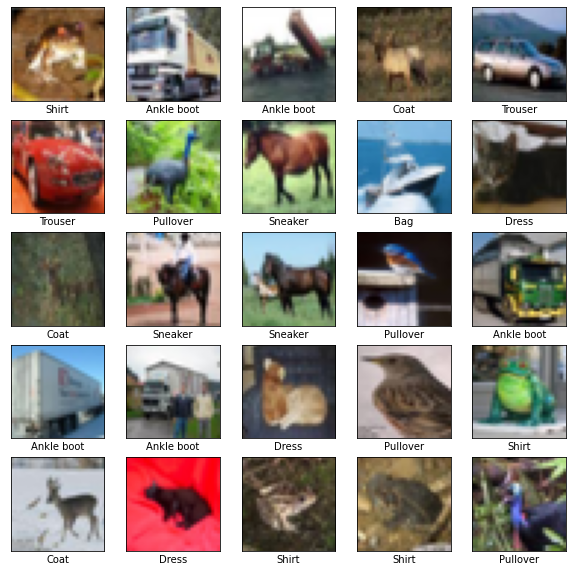

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [12]:
train_images.shape

(50000, 32, 32, 3)

**Create the convolutional base**

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


**Add Dense layers on top**

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

**Compile and train the mode**

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5156 - accuracy: 0.4450 - val_loss: 1.2752 - val_accuracy: 0.5436
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1516 - accuracy: 0.5917 - val_loss: 1.1759 - val_accuracy: 0.5827
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9989 - accuracy: 0.6486 - val_loss: 0.9707 - val_accuracy: 0.6615
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9060 - accuracy: 0.6806 - val_loss: 0.9391 - val_accuracy: 0.6711
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8310 - accuracy: 0.7107 - val_loss: 0.9476 - val_accuracy: 0.6731
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7733 - accuracy: 0.7274 - val_loss: 0.8855 - val_accuracy: 0.6954
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7255 - accuracy: 0.7452 - val_loss: 0.8775 -

**Evaluate the model**

313/313 - 4s - loss: 0.8339 - accuracy: 0.7212


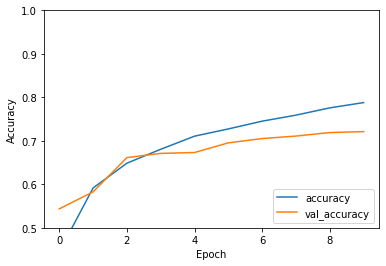

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss1, test_acc1 = model.evaluate(test_images,  test_labels, verbose=2)

In [20]:
print(test_acc1)

0.7211999893188477


In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history1 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4107 - accuracy: 0.4909 - val_loss: 1.2326 - val_accuracy: 0.5594
Epoch 2/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.0389 - accuracy: 0.6349 - val_loss: 0.9744 - val_accuracy: 0.6597
Epoch 3/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8719 - accuracy: 0.6920 - val_loss: 0.9171 - val_accuracy: 0.6798
Epoch 4/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.7589 - accuracy: 0.7340 - val_loss: 0.9096 - val_accuracy: 0.6850
Epoch 5/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.6640 - accuracy: 0.7667 - val_loss: 0.9076 - val_accuracy: 0.6951
Epoch 6/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.5742 - accuracy: 0.7960 - val_loss: 0.9100 - val_accuracy: 0.7011
Epoch 7/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.4923 - accuracy: 0.8251 - val_loss: 0

313/313 - 5s - loss: 1.2551 - accuracy: 0.6944


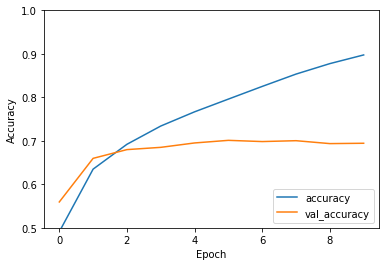

In [24]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss2, test_acc2 = model.evaluate(test_images,  test_labels, verbose=2)

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
history2 = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5428 - accuracy: 0.4342 - val_loss: 1.2803 - val_accuracy: 0.5385
Epoch 2/20
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1909 - accuracy: 0.5751 - val_loss: 1.0907 - val_accuracy: 0.6111
Epoch 3/20
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0507 - accuracy: 0.6310 - val_loss: 1.0162 - val_accuracy: 0.6437
Epoch 4/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9573 - accuracy: 0.6633 - val_loss: 0.9833 - val_accuracy: 0.6543
Epoch 5/20
1563/1563 [==============================] - 66s 43ms/step - loss: 0.8955 - accuracy: 0.6860 - val_loss: 0.9396 - val_accuracy: 0.6772
Epoch 6/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8446 - accuracy: 0.7044 - val_loss: 0.9195 - val_accuracy: 0.6830
Epoch 7/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7951 - accuracy: 0.7221 - val_loss: 0.9197 -

313/313 - 4s - loss: 0.9643 - accuracy: 0.7100


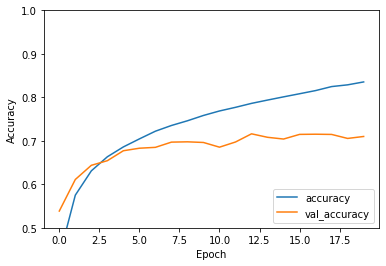

In [28]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss3, test_acc3 = model.evaluate(test_images,  test_labels, verbose=2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


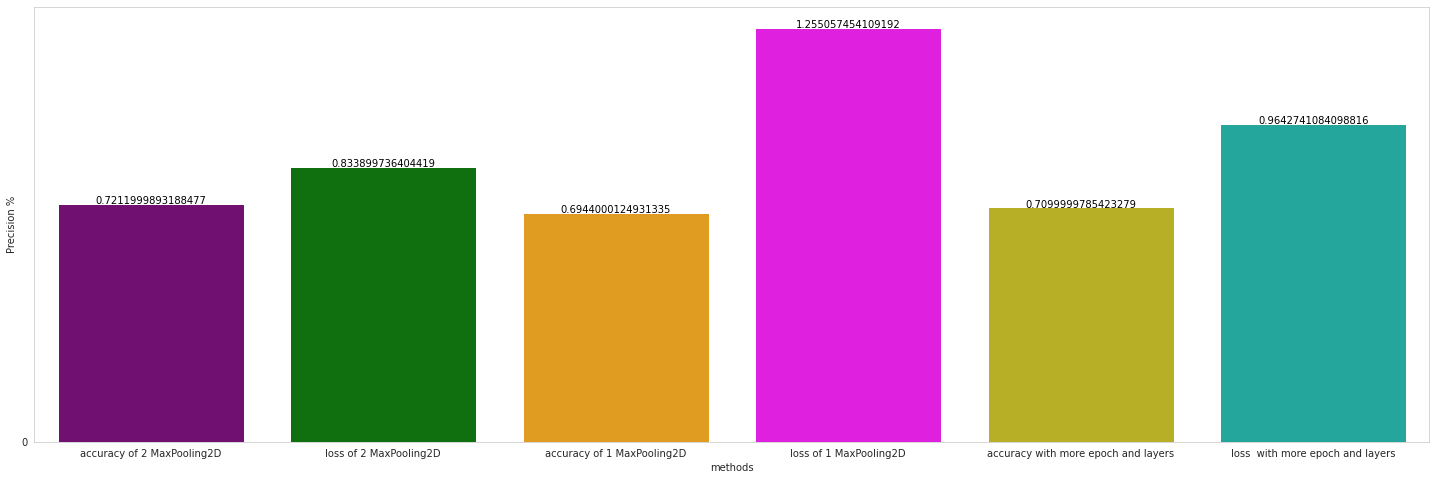

In [29]:
import seaborn as sns
import numpy as np
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
X=['accuracy of 2 MaxPooling2D','loss of 2 MaxPooling2D','accuracy of 1 MaxPooling2D','loss of 1 MaxPooling2D','accuracy with more epoch and layers','loss  with more epoch and layers']
Y=[test_acc1 , test_loss1 , test_acc2 , test_loss2 , test_acc3 , test_loss3]
sns.set_style("whitegrid")
plt.figure(figsize=(25,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Precision %")
plt.xlabel("methods")
g=sns.barplot(X, Y, palette=colors)
for i in range(len(Y)):
    g.text(i, Y[i],Y[i],color='black', ha="center")
plt.show()